# Assignment 4. Deep Learning

*Foundations of Data Science*  
*Dr. Khalaj (Fall 2023)*  

*For questions 1 refer to @alino_9 on Telegram.*

### Description  
This homework consists of four questions, each aimed at one category in the world of Deep Learning.   
1. Getting familiarized with sentiment analysis (A subject also covered in the course project).
   
2. Multi-layer perceptron (MLP).
   
3. Convolutional Neural Networks (CNN).
   
4. Variational Autoencoders (VAE).

### Information  
Complete the information box below.

In [1]:
full_name = 'Danial Ataie'
student_id = '99100455'

### Note
The questions are not necessarily in order of difficulty. You are obligated to answer **3 out of 4** questions. The fourth question is optional and is considered as bonus.

## 1 Twitter Sentiment Analysis

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Load and Visualize Dataset

In [2]:
## Load dataset and print the length of train and test
train = pd.read_csv('./train-tweets.csv')
test = pd.read_csv('./test-tweets.csv')
print("Train: ", len(train))
print("Test: ", len(test))

Train:  31962
Test:  17197


In [3]:
# Show some samples of train set and test set
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
# Check if there is any null value in train and test
train_nulls = train.isna().sum().sum()
test_nulls = test.isna().sum().sum()
print('train nulls: ', train_nulls)
print('test nulls', test_nulls)

train nulls:  0
test nulls 0


In [6]:
# Show 10 negative comments from train set
print(train[train['label'] == 1].head(10)['tweet'].values)

["@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot  "
 'no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins'
 'retweet if you agree! '
 '@user @user lumpy says i am a . prove it lumpy.'
 "it's unbelievable that in the 21st century we'd need something like this. again. #neverump  #xenophobia "
 '@user lets fight against  #love #peace '
 "ð\x9f\x98©the white establishment can't have blk folx running around loving themselves and promoting our greatness  "
 "@user hey, white people: you can call people 'white' by @user  #race  #identity #medâ\x80¦"
 'how the #altright uses  &amp; insecurity to lure men into #whitesupremacy    '
 "@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ\x80¦"]


In [7]:
# Show 10 positive comments from train set
print(train[train['label'] == 0].head(10)['tweet'].values)

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"
 '  bihday your majesty'
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  '
 ' factsguide: society now    #motivation'
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  '
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦'
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl"
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ '
 " @user @user welcome here !  i'm   it's so #gr8 ! "]


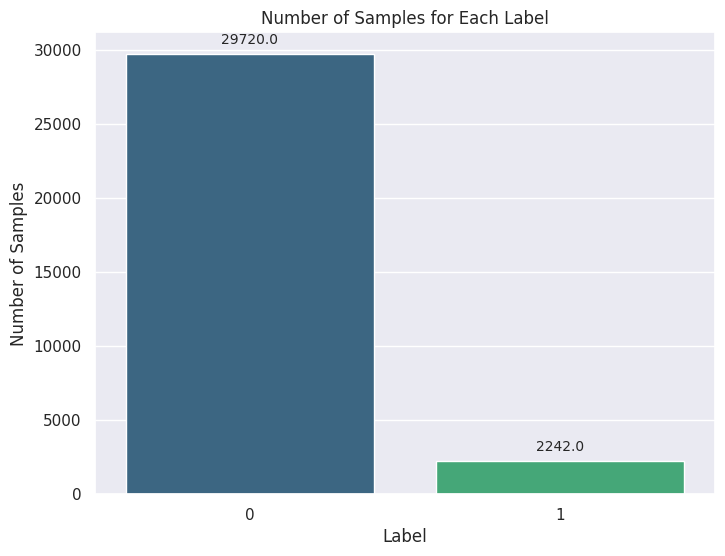

In [8]:
# Using barplot plot the number of samples for each label in train set
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='label', data=train, palette='viridis')
ax.set(xlabel="Label", ylabel="Number of Samples", title="Number of Samples for Each Label")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)
plt.show()

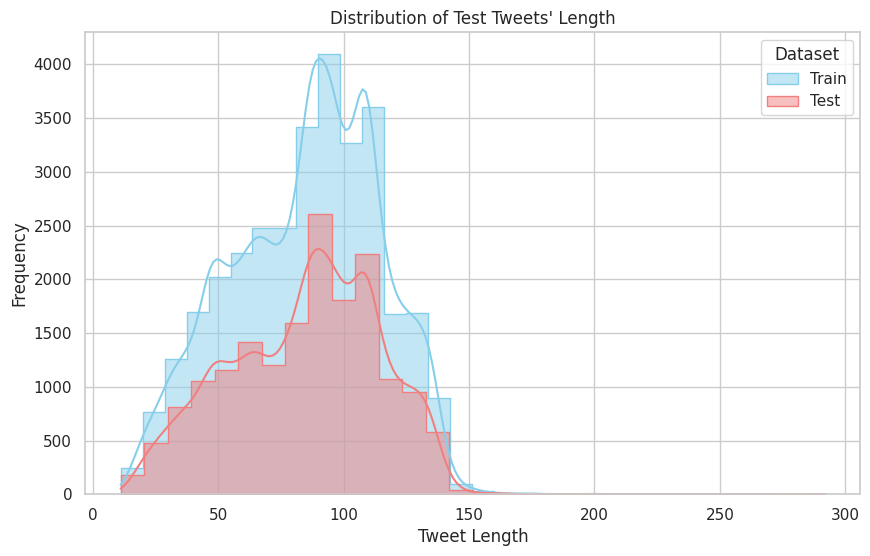

In [9]:
# Plot the distribution of tweets' length in the data (both train and test in one figure)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax_train = sns.histplot(train['tweet'].apply(len), bins=30, kde=True, color='skyblue', label='Train', element='step')
ax_train.set(xlabel="Tweet Length", ylabel="Frequency", title="Distribution of Train Tweets' Length")
ax_test = sns.histplot(test['tweet'].apply(len), bins=30, kde=True, color='lightcoral', label='Test', element='step')
ax_test.set(xlabel="Tweet Length", ylabel="Frequency", title="Distribution of Test Tweets' Length")
plt.legend(title='Dataset')
plt.show()

In [10]:
# Add a column to represent the length of the tweet
train['len'] = train['tweet'].apply(len)
test['len'] = test['tweet'].apply(len)

In [11]:
train.head(5)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39


In [12]:
train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

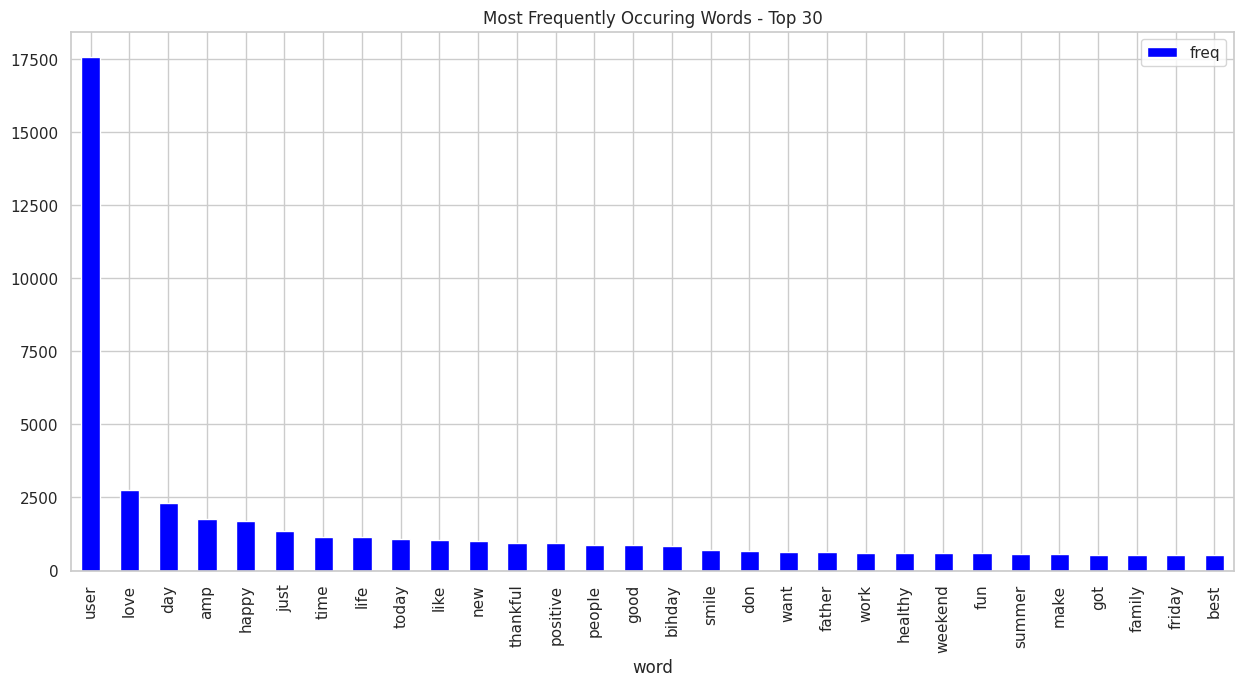

In [13]:
# Find top 30 most frequency words in the train set
# hint: you can use CountVectorizer from sklearn
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(train['tweet'])
word_freq = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])
words_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

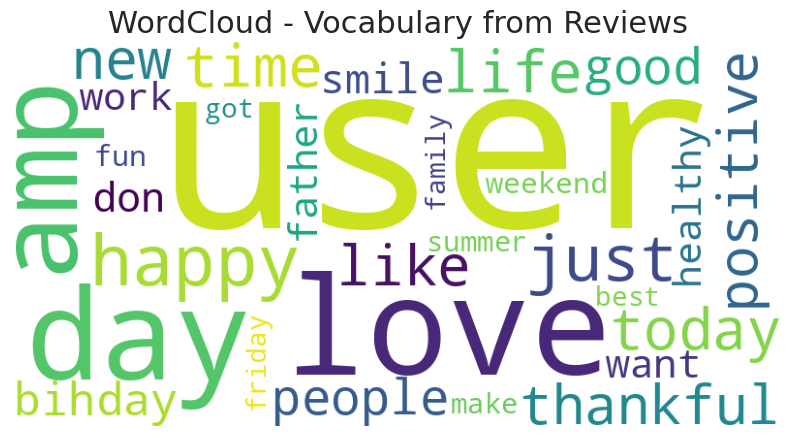

In [14]:
# plot the WordCloud for top 30 words
from wordcloud import WordCloud

top_30_words = frequency.head(30)
wordcloud_data = dict(zip(top_30_words['word'], top_30_words['freq']))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)
plt.axis('off')
plt.show()

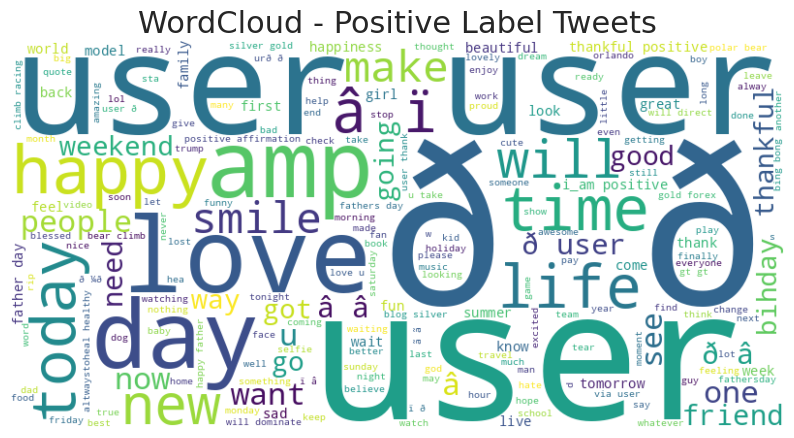

In [15]:
# plot the WordCloud for all words with positive label
positive_tweets = train[train['label'] == 0]['tweet']
# Combine positive tweets into a single string
positive_text = ' '.join(positive_tweets)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("WordCloud - Positive Label Tweets", fontsize=22)
plt.axis("off")
plt.show()

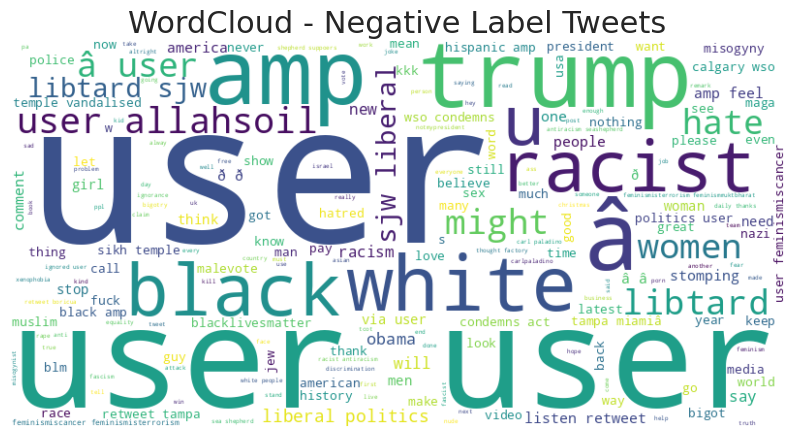

In [16]:
# plot the WordCloud for all words with negative label
negative_tweets = train[train['label'] == 1]['tweet']
# Combine positive tweets into a single string
negative_text = ' '.join(negative_tweets)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("WordCloud - Negative Label Tweets", fontsize=22)
plt.axis("off")
plt.show()

In [17]:
import re
# Define a function to extract the hashtags
# The output must be a list of hashtags
def hashtag_extract(x):
    hashtags = re.findall(r'\#\w+', x)
    return hashtags

In [18]:
# extract hashtags from non racist/sexist (positive or neutral) tweets
HT_regular = train[train['label'] == 0]['tweet'].apply(hashtag_extract)
HT_regular = HT_regular.explode().tolist()
HT_regular = [hashtag for hashtag in HT_regular if not pd.isna(hashtag)]
print(HT_regular[:5])

# extract hashtags from racist/sexist (negative) tweets
HT_negative = train[train['label'] == 1]['tweet'].apply(hashtag_extract)
HT_negative = HT_negative.explode().tolist()
HT_negative = [hashtag for hashtag in HT_negative if not pd.isna(hashtag)]
print(HT_negative[:5])

['#run', '#lyft', '#disapointed', '#getthanked', '#model']
['#cnn', '#michigan', '#tcot', '#australia', '#opkillingbay']


<Figure size 1200x800 with 0 Axes>

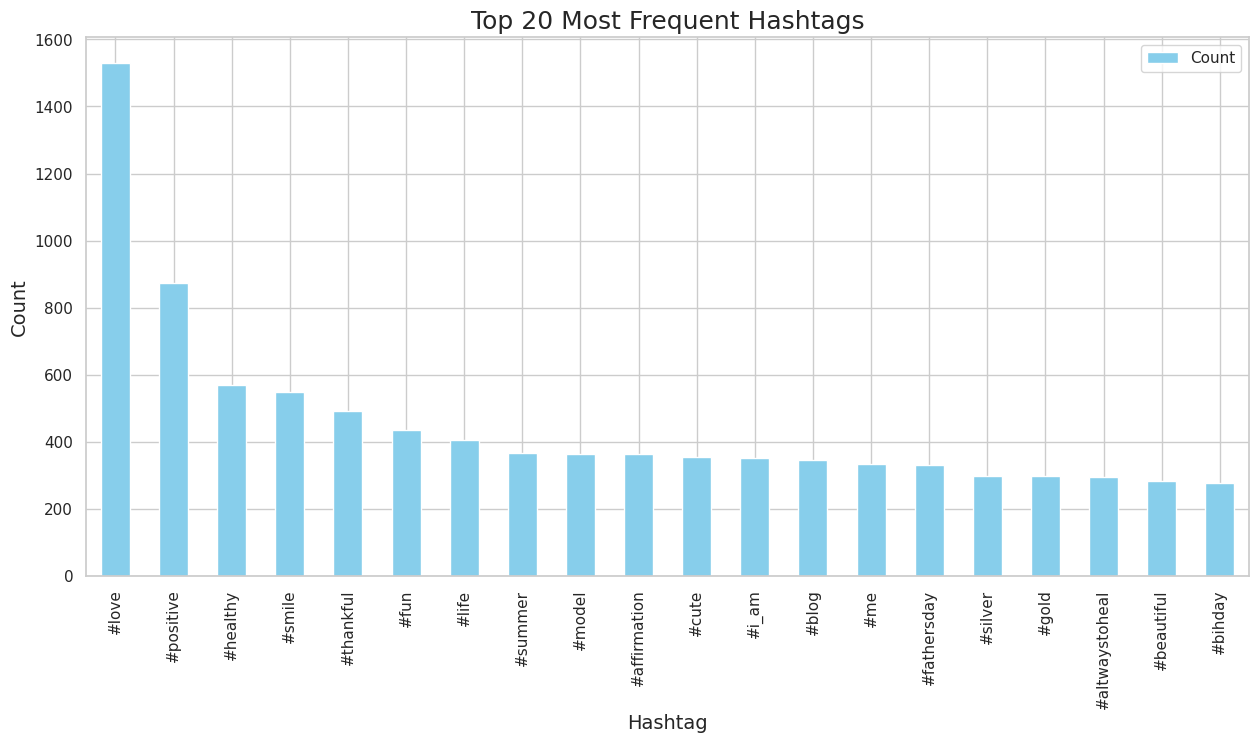

In [19]:
# Make a dataframe of regular hashtags and their count
from nltk import FreqDist

freq_dist = FreqDist(HT_regular)
df_hashtags = pd.DataFrame({'Hashtag': list(freq_dist.keys()), 'Count': list(freq_dist.values())})
df_hashtags = df_hashtags.sort_values(by='Count', ascending=False)
top_20_hashtags = df_hashtags.head(20)

# Select top 20 most frequent hashtags and plot their frequencies
plt.figure(figsize=(12, 8))
top_20_hashtags.plot(x='Hashtag', y='Count', kind='bar', color='skyblue', figsize=(15, 7))
plt.title("Top 20 Most Frequent Hashtags", fontsize=18)
plt.xlabel("Hashtag", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

<Figure size 1200x800 with 0 Axes>

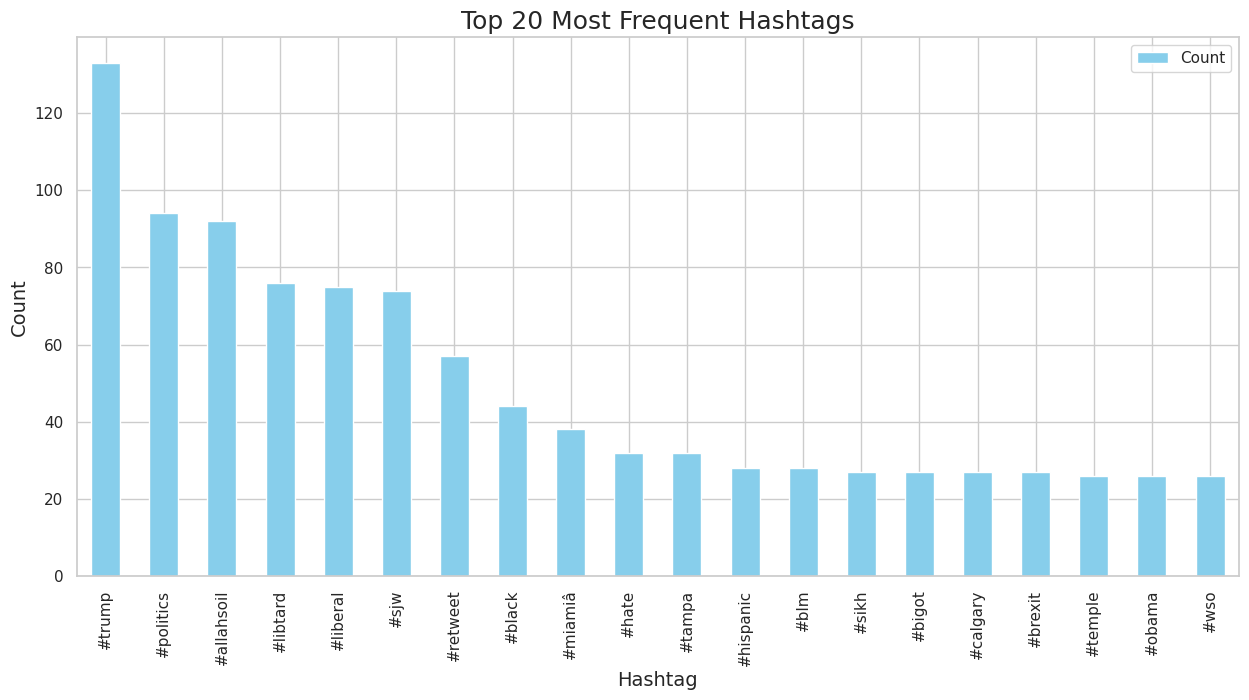

In [20]:
# Make a dataframe of negative hashtags and their count
freq_dist = FreqDist(HT_negative)
df_hashtags = pd.DataFrame({'Hashtag': list(freq_dist.keys()), 'Count': list(freq_dist.values())})
df_hashtags = df_hashtags.sort_values(by='Count', ascending=False)
top_20_hashtags = df_hashtags.head(20)

# Select top 20 most frequent hashtags and plot their frequencies
plt.figure(figsize=(12, 8))
top_20_hashtags.plot(x='Hashtag', y='Count', kind='bar', color='skyblue', figsize=(15, 7))
plt.title("Top 20 Most Frequent Hashtags", fontsize=18)
plt.xlabel("Hashtag", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

### 1.2 Pre-processing and Processing

In [23]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
# tokenize the words present in the train set and then train a Word2Vec model (use seed=34)
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

tokenized_tweet = train['tweet'].apply(word_tokenize)

model_Word2Vec = Word2Vec(sentences=tokenized_tweet, seed=34)

In [25]:
def find_most_similar(w):
    similar_words = model_Word2Vec.wv.most_similar(w, topn=5)

    print(f"Words most similar to '{w}':")
    for word, similarity in similar_words:
        print(f"{word}: {similarity}")

In [26]:
# Using the model you trained, print most similar words to 'dinner'
find_most_similar('dinner')

Words most similar to 'dinner':
shopping: 0.9785416126251221
photoshoot: 0.9595885276794434
brunch: 0.9586304426193237
bff: 0.9553171396255493
tattoo: 0.9501583576202393


In [27]:
# Using the model you trained, print most similar words to 'cancer'
find_most_similar('cancer')

Words most similar to 'cancer':
talks: 0.9724462032318115
standing: 0.9712322354316711
james: 0.9682314991950989
wars: 0.9655123949050903
level: 0.9637740850448608


In [28]:
# Using the model you trained, print most similar words to 'apple'
find_most_similar('apple')

Words most similar to 'apple':
destiny: 0.9767212867736816
delighted: 0.9757403135299683
mickey: 0.9757319092750549
comics: 0.9750411510467529
hâ¦: 0.9734068512916565


In [29]:
# Using the model you trained, print most similar words to 'hate'
find_most_similar('hate')

Words most similar to 'hate':
feel: 0.8814423680305481
agree: 0.8688229918479919
think: 0.8623548746109009
'd: 0.8568007946014404
wonder: 0.8540259003639221


In [30]:
# Removing unwanted patterns from the data
# In this part you should do any pre-processing that you think is helpful
# In the end you must have two lists (train_corpus and test_corpus) of pre-processed tweets

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

def preprocess_tweet(tweet):
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove user mentions, hashtags, and URLs
    tweet = re.sub(r'@\S+|#[^\s]+|http\S+', '', tweet)
    # Tokenize the tweet
    tokens = word_tokenize(tweet)
    # Remove stopwords and stem the words
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens if token.isalnum() and token not in stop_words]
    # Join tokens back into a string
    processed_tweet = ' '.join(tokens)
    return processed_tweet


train_corpus = [preprocess_tweet(tweet) for tweet in train['tweet']]
test_corpus = [preprocess_tweet(tweet) for tweet in test['tweet']]
print(train_corpus[:5])

['father dysfunct selfish drag kid dysfunct', 'thank credit ca use caus offer wheelchair van pdx', 'bihday majesti', 'love u take u time', 'factsguid societi']


In [31]:
# Create BoW (bag of words) for train set
# you can use CountVectorizer with max_features=2500
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2500)
x = cv.fit_transform(train['tweet']).toarray()
y = train['label'].values

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [32]:
# Create BoW (bag of words) for train set
# you can use CountVectorizer with max_features=2500
cv = CountVectorizer(max_features=2500)
x_test = cv.fit_transform(test['tweet']).toarray()

print(x_test.shape)

(17197, 2500)


In [33]:
from sklearn.model_selection import train_test_split

# splitting the training data into train and valid sets (use seed=42)
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(25569, 2500)
(6393, 2500)
(25569,)
(6393,)


In [34]:
# standardize data using StandardScaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.fit_transform(x_valid)
x_test = sc.fit_transform(x_test)

### 1.3 Train Classification Models

In this part you must train these classifier models:

*   Random Forest
*   Logistic Regression
*   Decision Tree
*   SVM


For each model you must report all of the following metrics for each train, validation and test sets:

*   Accuracy
*   f1 Score
*   Confusion Matrix


**Hint:** You can use sklearn library. All of the accuracies should be more than 90%.

In [35]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_train_pred = rf_model.predict(x_train)
y_valid_pred = rf_model.predict(x_valid)

accuracy_train = accuracy_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
cm_train = confusion_matrix(y_train, y_train_pred)

accuracy_valid = accuracy_score(y_valid, y_valid_pred)
f1_valid = f1_score(y_valid, y_valid_pred)
cm_valid = confusion_matrix(y_valid, y_valid_pred)

print("Training Set:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"F1 Score: {f1_train:.4f}")
print("Confusion Matrix:")
print(cm_train)

print("\nValidation Set:")
print(f"Accuracy: {accuracy_valid:.4f}")
print(f"F1 Score: {f1_valid:.4f}")
print("Confusion Matrix:")
print(cm_valid)

Training Set:
Accuracy: 0.9996
F1 Score: 0.9975
Confusion Matrix:
[[23783     0]
 [    9  1777]]

Validation Set:
Accuracy: 0.9551
F1 Score: 0.5975
Confusion Matrix:
[[5893   44]
 [ 243  213]]


In [36]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression


logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(x_train, y_train)
y_train_pred = logreg_model.predict(x_train)
y_valid_pred = logreg_model.predict(x_valid)

accuracy_train = accuracy_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
cm_train = confusion_matrix(y_train, y_train_pred)

accuracy_valid = accuracy_score(y_valid, y_valid_pred)
f1_valid = f1_score(y_valid, y_valid_pred)
cm_valid = confusion_matrix(y_valid, y_valid_pred)

print("Training Set:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"F1 Score: {f1_train:.4f}")
print("Confusion Matrix:")
print(cm_train)

print("\nValidation Set:")
print(f"Accuracy: {accuracy_valid:.4f}")
print(f"F1 Score: {f1_valid:.4f}")
print("Confusion Matrix:")
print(cm_valid)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Set:
Accuracy: 0.9821
F1 Score: 0.8642
Confusion Matrix:
[[23654   129]
 [  329  1457]]

Validation Set:
Accuracy: 0.9392
F1 Score: 0.5524
Confusion Matrix:
[[5764  173]
 [ 216  240]]


In [37]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier


dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_train_pred = dt_model.predict(x_train)
y_valid_pred = dt_model.predict(x_valid)

accuracy_train = accuracy_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
cm_train = confusion_matrix(y_train, y_train_pred)

accuracy_valid = accuracy_score(y_valid, y_valid_pred)
f1_valid = f1_score(y_valid, y_valid_pred)
cm_valid = confusion_matrix(y_valid, y_valid_pred)

print("Training Set:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"F1 Score: {f1_train:.4f}")
print("Confusion Matrix:")
print(cm_train)

print("\nValidation Set:")
print(f"Accuracy: {accuracy_valid:.4f}")
print(f"F1 Score: {f1_valid:.4f}")
print("Confusion Matrix:")
print(cm_valid)

Training Set:
Accuracy: 0.9997
F1 Score: 0.9978
Confusion Matrix:
[[23783     0]
 [    8  1778]]

Validation Set:
Accuracy: 0.9340
F1 Score: 0.5453
Confusion Matrix:
[[5718  219]
 [ 203  253]]


In [38]:
# SVM
from sklearn.svm import SVC


svm_model = SVC(random_state=42)
svm_model.fit(x_train, y_train)
y_train_pred = svm_model.predict(x_train)
y_valid_pred = svm_model.predict(x_valid)

accuracy_train = accuracy_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
cm_train = confusion_matrix(y_train, y_train_pred)

accuracy_valid = accuracy_score(y_valid, y_valid_pred)
f1_valid = f1_score(y_valid, y_valid_pred)
cm_valid = confusion_matrix(y_valid, y_valid_pred)

print("Training Set:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"F1 Score: {f1_train:.4f}")
print("Confusion Matrix:")
print(cm_train)

print("\nValidation Set:")
print(f"Accuracy: {accuracy_valid:.4f}")
print(f"F1 Score: {f1_valid:.4f}")
print("Confusion Matrix:")
print(cm_valid)

Training Set:
Accuracy: 0.9747
F1 Score: 0.7810
Confusion Matrix:
[[23768    15]
 [  632  1154]]

Validation Set:
Accuracy: 0.9517
F1 Score: 0.5008
Confusion Matrix:
[[5929    8]
 [ 301  155]]


###  1.4 Unbalanced Datasets and Deep Learning

The approach to this part is entirely up to you. You can use libraries or methods that you prefer. Make sure to provide an explanation for each step.  
1. Discuss potential strategies for handling an unbalanced dataset. Choose one approach, apply it to train a classifier model, and then report the accuracy and confusion matrix.

One of the problems that we have in real world problems is class imbalance in dataset. In order to fix this problem there is an approach in which we use different weights for each class. This way we will give more importance to the minority class compared to the usual approch. I will demonstrate this using RandomForest model here.

In [39]:
from sklearn.utils.class_weight import compute_class_weight


class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

rf_model_balanced = RandomForestClassifier(random_state=42, class_weight=class_weight_dict)
rf_model_balanced.fit(x_train, y_train)

y_train_pred_balanced = rf_model_balanced.predict(x_train)
y_valid_pred_balanced = rf_model_balanced.predict(x_valid)

accuracy_train_balanced = accuracy_score(y_train, y_train_pred_balanced)
cm_train_balanced = confusion_matrix(y_train, y_train_pred_balanced)

accuracy_valid_balanced = accuracy_score(y_valid, y_valid_pred_balanced)
cm_valid_balanced = confusion_matrix(y_valid, y_valid_pred_balanced)

print("Balanced Training Set:")
print(f"Accuracy: {accuracy_train_balanced:.4f}")
print("Confusion Matrix:")
print(cm_train_balanced)

print("Balanced Validation Set:")
print(f"Accuracy: {accuracy_valid_balanced:.4f}")
print("Confusion Matrix:")
print(cm_valid_balanced)

Balanced Training Set:
Accuracy: 0.9995
Confusion Matrix:
[[23774     9]
 [    3  1783]]
Balanced Validation Set:
Accuracy: 0.9528
Confusion Matrix:
[[5893   44]
 [ 258  198]]


2. Using a deep-learning-based method to classify the tweets into two categories positive and negetive.

In [22]:
# imports
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, LSTM, Dense, SpatialDropout1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
# Tokenize the tweets
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['tweet'])
vocab_size = len(tokenizer.word_index) + 1

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(train['tweet'])

# Pad sequences to ensure equal length
padded_sequences = pad_sequences(sequences, maxlen=100)

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(padded_sequences, train['label'], test_size=0.2, random_state=42)

In [24]:
# Network
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=100))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_valid, y_valid))

# Predictions on training set
y_train_pred_complex = (model.predict(x_train) > 0.5).astype(int).flatten()

# Predictions on validation set
y_valid_pred_complex = (model.predict(x_valid) > 0.5).astype(int).flatten()

# Evaluate the model on training set
accuracy_train_complex = accuracy_score(y_train, y_train_pred_complex)
cm_train_complex = confusion_matrix(y_train, y_train_pred_complex)

# Evaluate the model on validation set
accuracy_valid_complex = accuracy_score(y_valid, y_valid_pred_complex)
cm_valid_complex = confusion_matrix(y_valid, y_valid_pred_complex)

Epoch 1/10
800/800 [==============================] - 26s 24ms/step - loss: 0.1735 - accuracy: 0.9443 - val_loss: 0.1293 - val_accuracy: 0.9537
Epoch 2/10
800/800 [==============================] - 8s 10ms/step - loss: 0.0659 - accuracy: 0.9778 - val_loss: 0.1221 - val_accuracy: 0.9604
Epoch 3/10
800/800 [==============================] - 9s 11ms/step - loss: 0.0247 - accuracy: 0.9908 - val_loss: 0.1442 - val_accuracy: 0.9557
Epoch 4/10
800/800 [==============================] - 9s 11ms/step - loss: 0.0111 - accuracy: 0.9969 - val_loss: 0.1924 - val_accuracy: 0.9581
Epoch 5/10
800/800 [==============================] - 8s 10ms/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 0.2250 - val_accuracy: 0.9499
Epoch 6/10
800/800 [==============================] - 9s 11ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.2807 - val_accuracy: 0.9545
Epoch 7/10
800/800 [==============================] - 8s 10ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.3006 - val_accuracy: 0.953

In [25]:
# Final report
print("Complex Neural Network - Training Set:")
print(f"Accuracy: {accuracy_train_complex:.4f}")
print("Confusion Matrix:")
print(cm_train_complex)

print("\nComplex Neural Network - Validation Set:")
print(f"Accuracy: {accuracy_valid_complex:.4f}")
print("Confusion Matrix:")
print(cm_valid_complex)

Complex Neural Network - Training Set:
Accuracy: 0.9996
Confusion Matrix:
[[23783     0]
 [    9  1777]]

Complex Neural Network - Validation Set:
Accuracy: 0.9553
Confusion Matrix:
[[5835  102]
 [ 184  272]]
